## Второй этап после analyze_images (тоже оказался бесполезным)

Этот код был написан на ранних стадиях проекта, в настоящий момент он даже не запустится, потому что многое в проекте изменилось, но я решил, что необходимо оставить этот ноутбук, чтобы была понятна примерная идея ноутбука analyze_images

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
import json

In [2]:
def concat_dicts(d1={}, d2={}, d3={}):
    answer_d = {}
    for d in [d1, d2, d3]:
        for key in d:
            if key in answer_d:
                print(f'got key "{key}" twice, skip')
                continue
            answer_d[key] = d[key]
    return answer_d

In [3]:
json_path1 = 'data/analyzed/analyzed_images9-100.json'
json_path2 = 'data/analyzed/analyzed_images101-1000.json'

with open(json_path1) as json_file1:
    answers1 = json.load(json_file1)
    
with open(json_path2) as json_file2:
    answers2 = json.load(json_file2)
    
answers = concat_dicts(answers1, answers2)

df = pd.DataFrame(answers.values(), columns=['image', 'ac', 'otsu'], index=answers.keys())

bad_images = df[df['image'] == 0]
ok_images = df[df['image'] == 1]
good_images = df[df['image'] == 2]

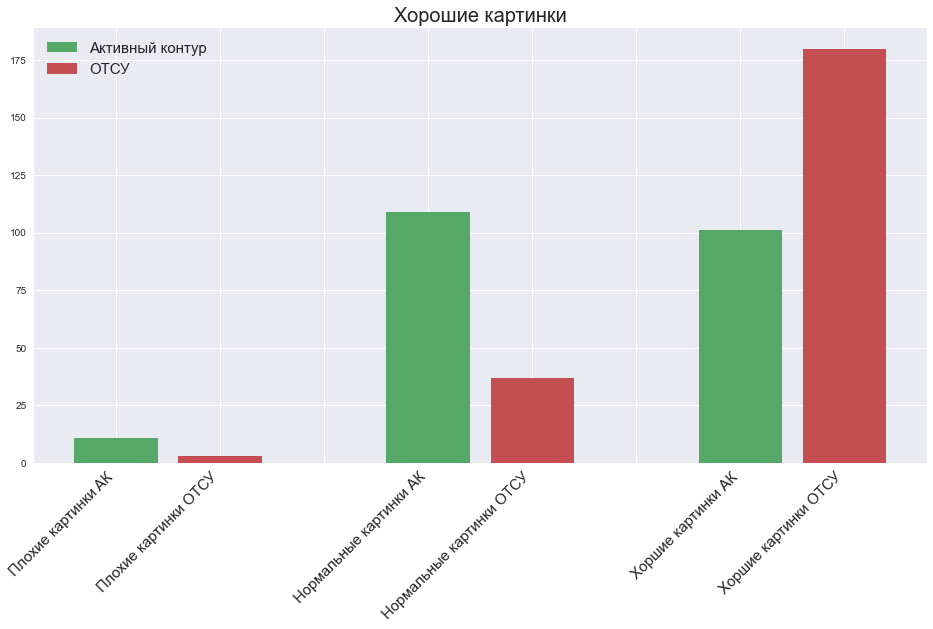

In [29]:
# ХОРОШИЕ КАРТИНКИ
current_df = good_images
x0 = ['Плохие картинки AК',
    'Плохие картинки ОТСУ', 
    '  ',
    'Нормальные картинки АК',
    'Нормальные картинки ОТСУ',
    ' ',
    'Хоршие картинки АК', 
    'Хоршие картинки ОТСУ']

y0 = [0]*8

x1 = ['Плохие картинки AК', 'Нормальные картинки АК', 'Хоршие картинки АК']
y1 = [len(current_df[current_df['ac'] == 0]), len(current_df[current_df['ac'] == 1]), len(current_df[current_df['ac'] == 2])]

x2 = ['Плохие картинки ОТСУ', 'Нормальные картинки ОТСУ', 'Хоршие картинки ОТСУ']
y2 = [len(current_df[current_df['otsu'] == 0]), len(current_df[current_df['otsu'] == 1]), len(current_df[current_df['otsu'] == 2])]


plt.style.use('seaborn')
fig, axes = plt.subplots(1,1, figsize=(16,8))
axes.set_title('Хорошие картинки', fontsize=20)
axes.bar(x0, y0)
axes.bar(x1, y1, label = 'Активный контур')
axes.bar(x2, y2, label = 'ОТСУ')

axes.legend(loc='upper left', fontsize=15)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
plt.savefig('good_images.png', bbox_inches='tight')

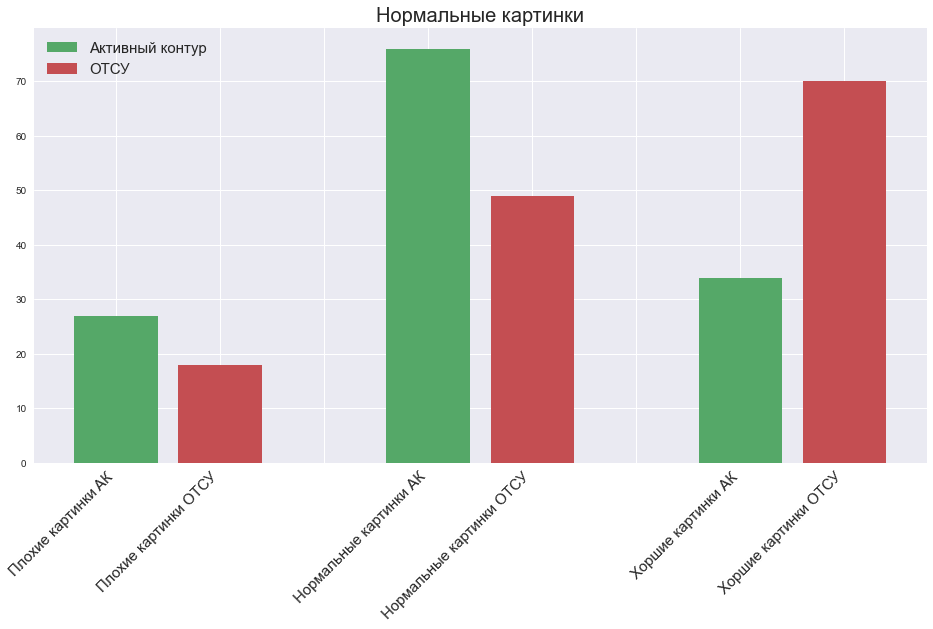

In [30]:
# НОРМАЛЬНЫЕ КАРТИНКИ
current_df = ok_images
x0 = ['Плохие картинки AК',
    'Плохие картинки ОТСУ', 
    '  ',
    'Нормальные картинки АК',
    'Нормальные картинки ОТСУ',
    ' ',
    'Хоршие картинки АК', 
    'Хоршие картинки ОТСУ']

y0 = [0]*8

x1 = ['Плохие картинки AК', 'Нормальные картинки АК', 'Хоршие картинки АК']
y1 = [len(current_df[current_df['ac'] == 0]), len(current_df[current_df['ac'] == 1]), len(current_df[current_df['ac'] == 2])]

x2 = ['Плохие картинки ОТСУ', 'Нормальные картинки ОТСУ', 'Хоршие картинки ОТСУ']
y2 = [len(current_df[current_df['otsu'] == 0]), len(current_df[current_df['otsu'] == 1]), len(current_df[current_df['otsu'] == 2])]


plt.style.use('seaborn')
fig, axes = plt.subplots(1,1, figsize=(16,8))
axes.set_title('Нормальные картинки', fontsize=20)
axes.bar(x0, y0)
axes.bar(x1, y1, label = 'Активный контур')
axes.bar(x2, y2, label = 'ОТСУ')

axes.legend(loc='upper left', fontsize=15)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
plt.savefig('ok_images.png', bbox_inches='tight')